In [1]:
import cognitive_face as cf

key = '41c640b5a5ed45699e0797a76c7af4be'
cf.Key.set(key)
base_url = 'https://westus.api.cognitive.microsoft.com/face/v1.0/'
cf.BaseUrl.set(base_url)
from datetime import datetime


In [2]:
from camera_pi import Camera
camera = Camera()

Starting camera thread.


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
for i in range(50):
    image = './faces/test/ATest_%d.png' %(i)
    with open(image, 'wb') as f:
        f.write(camera.get_frame())
        f.close()
    time.sleep(0.1)

In [4]:
def AddFace(name):
    person_list = cf.person.lists('my_friends')
    if all(dic['name'] != name for dic in person_list):
        responses = cf.person.create('my_friends', name)
        person_id = responses['personId']
        print('Added {}'.format(person_id))
    else:
        for dic in person_list:
            if dic['name'] == name:
                person_id = dic['personId']
                break
    for num in range(1):
        image = '/home/pi/ece498iot/lab4/sherlock-azure/faces/test/%s.png' %(name)
        with open(image, 'wb') as f:
            f.write(camera.get_frame())
            f.close()
        detect_responses = cf.face.detect(image)
        if len(detect_responses) != 1:
            return False
        responses = cf.person.add_face(image, 'my_friends', person_id)
        print(responses)
    responses = cf.person.lists('my_friends')
    print(responses)
    responses = cf.person_group.train('my_friends')
    print(responses)
    return True

In [8]:
import time 
for person in cf.person.lists('my_friends'):
    if person['name'] == 'John':
        cf.person.delete('my_friends', person['personId'])
        print('Ha')
AddFace('John')
g = []
t = []
for i in range(10):
    time_s = time.perf_counter()
    image = './faces/test/ATest_%d.png' %(i)
    detect_responses = cf.face.detect(image)
    face_id_list = []
    for faces in detect_responses:
        face_id = faces['faceId']
        face_id_list.append(face_id)
    identify_responses = cf.face.identify(face_id_list, 'my_friends')
    confidence = identify_responses[0]['candidates'][0]['confidence']
    print(confidence)
    for person in cf.person.lists('my_friends'):
        identified = identify_responses[0]['candidates'][0]
        if person['personId'] == identified['personId'] and len(identify_responses) == 1:
            responses = cf.person.add_face(image, 'my_friends', person['personId'])
            responses = cf.person_group.train('my_friends')
            identified_name = person['name']
            print(identified_name)
            break
    time_t = time.perf_counter()
    g.append(confidence)
    t.append(time_t - time_s)
print(sum(t)/10)

Ha
Added a491a4f5-fe17-4f4b-b60f-c5d5f1bc751b
{'persistedFaceId': '1c08ae0a-b1eb-470f-b339-f4456464b435'}
[{'persistedFaceIds': [], 'name': 'Dummy', 'userData': None, 'personId': '7e47ec20-8619-4d04-8368-b73ef7b66245'}, {'persistedFaceIds': ['0012fd92-f7e5-42e9-bfde-a1899036daf2', '161cd41a-e331-4ca2-a527-75d37613ffd9', '1d4d3b66-bec6-42f4-93b3-60d9efba6e15', '4f026aa6-3ab7-4626-8a29-f48a13065d8f', '55d08301-4e71-42e0-96da-24ade9882e4a', '7038f4d9-dc18-41a9-81ea-b0cf10076c09', '89000ce9-1943-42e7-8524-f11f4445c28f', '95924d55-cdf3-4f52-a163-36e50a894aad', '9df1809d-1533-4c92-9a80-f20f331408d2', '9e6e95f7-6df5-4f82-ad6c-f04376fb1b62', 'ec411cbe-cfed-45c1-b694-a799f44a39ab', 'ec7d5a88-a65f-41f5-9def-5a3e41d5feb5', 'f3e8258c-d2cb-4b78-8bb3-a004502158cd'], 'name': 'Una', 'userData': None, 'personId': '7fb4d34d-a8fc-41f9-a104-f97a137c9416'}, {'persistedFaceIds': ['1c08ae0a-b1eb-470f-b339-f4456464b435'], 'name': 'John', 'userData': None, 'personId': 'a491a4f5-fe17-4f4b-b60f-c5d5f1bc751b'}]
{

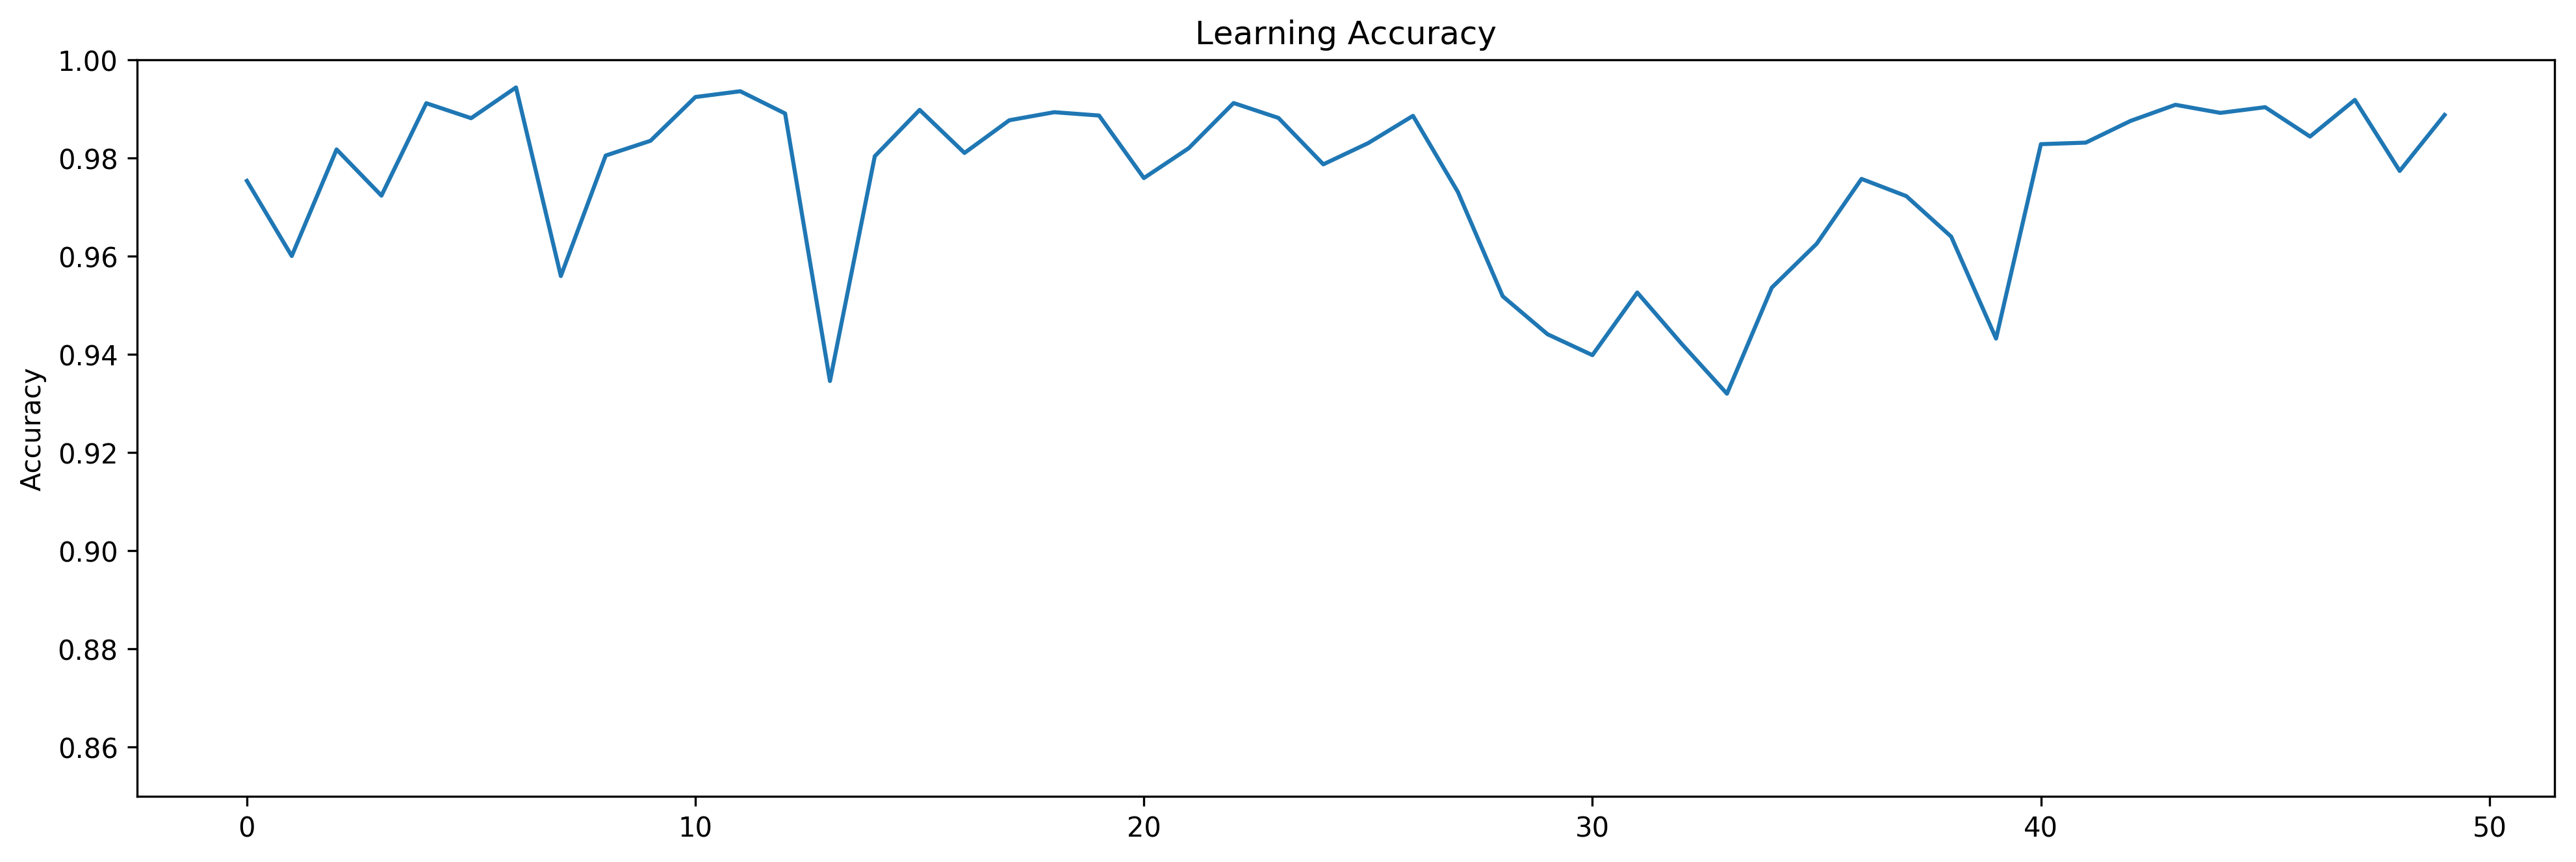

In [6]:
plt.figure(1, figsize=(16, 5), dpi=300)
plt.plot(g)
plt.ylim(0.85, 1)
plt.title('Learning Accuracy')
plt.ylabel('Accuracy')
plt.show()

In [7]:
def IdentifyFace():
    image = '/home/pi/ece498iot/lab4/sherlock-azure/faces/test/Detection_%s.png' %(datetime.now().strftime('%Y%m%d_%H%M%S'))
    with open(image, 'wb') as f:
        f.write(camera.get_frame())
        f.close()
    detect_responses = cf.face.detect(image)
    if len(detect_responses) == 0:
        return 'no one'
    face_id_list = []
    for faces in detect_responses:
        face_id = faces['faceId']
        face_id_list.append(face_id)
    identify_responses = cf.face.identify(face_id_list, 'my_friends')
    confidence = identify_responses[0]['candidates'][0]['confidence']
    print(confidence)
    for person in cf.person.lists('my_friends'):
        identified = identify_responses[0]['candidates'][0]
        if person['personId'] == identified['personId'] and len(identify_responses) == 1:
            responses = cf.person.add_face(image, 'my_friends', person['personId'])
            responses = cf.person_group.train('my_friends')
            identified_name = person['name']
            print(identified_name)
            break
    return identified_name, confidence